# Python Worksheet: Maximum Likelihood for a Nonlinear Problem

Dear students,

My team and I tried hard to get a useful exercise for MLE. MLE is a crucial tool for all data science. In addition, our standard problem set was handed out as part of the python lecture notes. We hence had to come up with something useful, yet, also doable at the BSc level.

The following exercise is the result. We will likely spend some time discussing your and my work during the upcoming prof cafe.

## Remember this Crucial FACT

**Do NOT numerically optimize a Gaussian likelihood for a LINEAR model. Instead, take the ML parameter estimates from an OLS fit AND the ML estimate for the volatility from the respective residual**

\begin{equation}
\sqrt{\frac{1}{T} \epsilon_{ols}' \epsilon_{ols}}
\end{equation}

##  A Useful Exercise had to be Non-Linear

Reason: see above

## G.0 Set-up of the Python Challenge

Have you ever wondered how central banks, banks, hedge funds and investors know whether a government bond is fairly priced, overpriced or undervalued? Well, they use the approach of "net present value" to figure out what the price of a bond should be. To do so, one has to get accurate forecasts of how the short rate and risk premia move into the future. A popular approach relies on so called "short rate models". These models fit the time series of the short rate to a realistic, yet convenient, parametrization. This allows to obtain a forecast of where short rates will be in the future. You need to do the same for the risk premium. You might wonder why do government bonds pay a risk premium. Well, the longer the maturity of the bond, the higher the interest rate sensitivity and hence, the higher (usually) the (maturity) premium. That premium compensates for the fact that future realized interest rates will be different from todays expected future rates. Based on the CAPM, you could say that interest rate risk is systematic and hence pays a risk premium. That is for the background.

A very popular short rate model is called "Vasicek model". That is because a mathematician, Dr. Vasicek, derived in the 1980s the term structure of interest rates under the assumption that the short rate follows a Gaussian distribution. It is fair to says that the assumed short rate follows a G-LRM. Based on stochastic calculus and the principle of net present value and no arbitrage, Dr. Vasicek derived the price of risk-free (non defaultable) bonds for different maturities. 

The Gaussian PDF of the short rate is

\begin{equation}
r_t | F_{t-1} \sim \mathcal N\left(\theta^P (1- e^{-\kappa^P})+e^{-\kappa^P} r_{t-1}, \sigma^2 * \frac{1-e^{-2\kappa^P}}{2\kappa^P}\right).
\end{equation}

Note, $\theta^P$ is the long-run mean of $r$, $\kappa^P$ is the speed of mean reversion and $\sigma$ is the instantaneous standard deviation of the interest rate shock. As the model of Vasicek is written in continuous time, the above PDF takes several exponentials and ratios, which are the result of an integration that is NOT subject to our BSc course.

Also, Dr. Vasicek derived that the arbitrage-free price of a bond at time $t$ with maturity in $\tau$ periods, $P_t(\tau)$ coincides with

\begin{equation}
P_t(\tau) = e^{A(\tau) - B(\tau) \times r_t}
\end{equation}

with
\begin{align*}
B(\tau) &:= \frac{1-e^{-\kappa^Q \tau}}{\kappa^Q} \\
A(\tau) &:= (\theta^Q - \frac{\sigma^2}{2 (\kappa^Q)^2}) \times (  B(\tau) - \tau ) - \frac{\sigma^2}{4\kappa^Q} B^2(\tau) 
\end{align*}


Note, from the CAPM and NPV you know that prices of financial assets are discounted by the risk-free rate plus risk premium. The parameters $\theta^Q$ and $\kappa^Q$ differ from $\theta^P$ and $\kappa^P$, respectively. The former are adjusted by risk premiums. Intuitively, it is correct to think that the former are risk premium adjusted expressions of the latter. E.g. if the long-run mean of the short rate was at 2\%, it could be that bonds are priced as if the long-run rate was at 3\%. This means the price is lower than if the future payoff was discounted by 2\%. That extra reduction in price can be correctly interpreted as the result of a risk premium. That was to show you that the so called "Q parameters" are risk premium adjusted (and extracted from prices), while the $P$ parameters are extracted from empirical time-series data. I provide a formal and intuitive introduction into these asset pricing concepts in an upcoming MSc class on financial machine learning.

For now, you need only to keep in mind that the parameters of the model are $\kappa^P, \theta^P$ for the short rate PDF and $\theta^Q, \kappa^Q$ for the bond prices. The parameter $\sigma$ affects both, the short rate PDF and the bond price PDF.

Note, prices are non-stationary! Hence, we work with continuousy compounded yields
\begin{align*}
y_t(\tau) &:= - \frac{1}{\tau} \ln P_t(\tau)  
\end{align*}
 




## G.1 Data

You will work with the same interest rate data than a couple of weeks ago. The rates are in "GovBondYields.xls". 

Take the 12-, 60 and 120 months interest rates as your yields of interest, $y$. Take the 3-month yield as the short rate $r$.

**Units:** Divide the rates data by 1200 to arrive at monthly values in decimals. Work with these units.

 


## G.2 Financial Data Science Challenge

Your data science task is to extract the time-series of the expected (interest rate) risk premium that is priced-into government bonds. 
 


## G.3 Battle Plan

The battle plan is as follows. 

$$
\\
$$

1. Write down the joint log likelihood function for $r_t$ and $y_t(\tau), \tau \in [12,60,120]$. For that assume a pairwise independent Gaussian measurement error for all yields. Further assume each of these measurement errors shares the same volatility, which we call
$$
\sigma_y.
$$
Note, $\sigma_y$ will be part of the parameter vector over which you optimize.

Note, you can interpret observed yields as Vasicek (model)-implied yield $y_t(\tau)$ plus a Gaussian measurement error that is drawn from $N(0,\sigma^2_y)$.

Note: the above assumption implies that the joint log likelihood function can be treated as the sum of 4 pairwise independent log likelihood functions. The independence refers to the respective residual being independent of the residuals of the other log likelihood. The parameters do of course affect all of the log likelihoods; although strictly speaking, $\kappa^P, \theta^P$ affect only the log likelihood for $r$, while $\kappa^Q, \theta^Q$ affect only the log likelhood for the 3 yields.


$$
\\
$$

2. Write a python function that implements the joint log likelihood function. More recent research has shown you could indeed fit the PDF for $r$ independently for the PDF of $y$. Yet, here, we optimize the joint log likelihood.

**Hint:** Multivariate Gaussian likelihood: https://en.wikipedia.org/wiki/Multivariate_normal_distribution

yet, yours will look simpler as we made some simplifying assumptions. 


$$
\\
$$

3. Play a bit around with starting values for the optimization. That simple example reveals already, that you need to choose starting values carefully to end up in the global optimum. Regardless of your playing around, use at least the following procedure to find smart starting values

3.1 fit $r$ to an OLS and recover the ML estimates for $\kappa^P, \theta^P, \sigma$. Make these parameters be the respective starting values $\kappa^P, \theta^P, \sigma$ in  the joint log likelihood optimization. 

3.2 for the starting values of the Q parameters, we assume a 0 risk premium. Hence $\kappa^Q_{startValue} = \kappa^P_{startValue}$ and $\theta^Q_{startValue} = \theta^P_{startValue}$. Double check: inside the optimization, Q and P parameters can differ(!). P parameters affect $r$ while $Q$ parameters affect yields (!)

3.3 For the starting value of $\sigma_y$ we do the following: Regress (OLS) the 60month yield onto $r$ and take the volatility of the residual as the starting value for $\sigma_y$, i.e. (np.sqrt( (...).mse_resid)) where we use the MSE_RESID function of stats model's OLS package. 

**Hint (1):** The rounded ols starting values coincide with 0.014895, 0.00466, 0.014895, 0.00466, 0.00037794, 0.000777 for $\kappa^P$, $\theta^P$, $\kappa^Q$, $\theta_Q$, $\sigma$, $\sigma_y$, respectively.

**Hint (2):** The negative of the joint log likelihood function (over $r$ and $y$), evaluated at   the OLS starting values coincides with -1305x.xxxx (around -13k) 


$$
\\
$$

4. The optimization routine is similar to the ipynb from class. Yet, you will learn that the local optimizer fails to find parameters that beat the starting values. 

4.1 use sco.minimize

4.2 use L-BFGS-B as the optimization routine

4.3 use a 'gtol' and 'ftol* of 1e-12

4.4 minimize the negative joint log likelihood function

4.6 the upper bound for all parameters is **1**. 

4.7 the lower bound for all parameters is **-1**, except for $\sigma$ and $\sigma_y$ whose lower bound we set to **0.00001**.


$$
\\
$$

5. That nonlinear problem requires a global optimization routine. Hence, redo the optimization with the following numerical optimizer: 

from scipy.optimize import dual_annealing

results_annealing = dual_annealing(func=likelihood_neg, args=(rate_df, yield_df), bounds=bnds_all, seed=19937, maxiter=2000)

where likelihood_neg is the function that computes the negative join log likelihood, args = (...) are the pandas data frames for the short rate $r$ and the 3 yields $y$ that are used to learn the parameters, and bnds_all is a tuple containing the lower and upper bounds as in 4.6 and 4.7. 


$$
\\
$$


6. Estimate the model parameters of Vasicek using the local optimizer from step 4 and the global one from step 5.

**Hint:** The optimal joint log likelihood function takes the value (for global optimization) of -1481x.xxxx around (-14.8k). 

**Praktomat will ask for:** MLE for $\kappa^P$, $\theta^P$, $\kappa^Q$, $\theta_Q$, $\sigma$, $\sigma_y$, respectively of the local and the global optimization routine.


$$
\\
$$

7. Inside the vasicek model, the priced-in expected risk premium of a $\tau$ maturity bond, $ERP_{t,\tau}$ is

\begin{align*}
ERP_{t,\tau} &= -B(\tau) \times \sigma \times MPR_t \\
MPR_t &:= \lambda_0 + \lambda_1 \times r_t
\end{align*}

with
\begin{align*}
\lambda_0 &:= \frac{\kappa^P \theta^P - \kappa^Q \theta^Q}{\sigma_r} \\
\lambda_1 &:= \frac{\kappa^Q - \kappa^P}{\sigma_r}.
\end{align*}

and $B(\tau)$ being the interest rate loading in the Vasicek derivation of the bond price (i.e. duration of the bond).

Here, you see that spread of Q and P parameters captures risk premium information. A formal explanation of that is not doable in the BSc course on Financial Data Science.

Plot the time series of the expected risk premium for the 1-yr and 10-yr bond. 

**Praktomat will ask for:** $ERP_{0,120}$, $ERP_{10,120}$, $ERP_{100,120}$, $ERP_{500,120}$.


$$
\\
$$

8. Consider the basic return decompostion: $r = \mu + \epsilon$. Plot the respective $\mu$ and $\epsilon$ for the ten-year bond. Compare it to the return decomposition that you have seen for equity returns.

**Hint:**
\begin{align*}
\mu &:= r_t + ERP_{t,\tau}|_{\tau = 120} \\
\epsilon &:= -B(\tau)|_{\tau=120} \times  \epsilon^{r}
\end{align*}

where $\epsilon^{r}$ is the realized innovation (i.e. residual) to the short rate. 

**Hint:** you get $\epsilon^{r}$ from the time series of $r_t$ and its respective Gaussian PDF.

**Hint on Hint:** Take the MLE implied interest rate innovation (residual) and you found the time series of $\epsilon^r$.

Note: Ensure you see why a surprise increase in the short rate $\epsilon^{r}>0$ leads to a negative bond return (i.e. higher discount rate than expected, lower price than expected).


**Praktomat will ask for:** $\mu[0], \mu[1], \mu[100], \mu[500]$ and $\epsilon[0], \epsilon[1], \epsilon[100], \epsilon[500]$.

$$
\\
$$

9. As you plot the ten-year bond yield in data and the vasicek implied ten-year bond yield (from the global optimiztion) you will notice that the one factor model of vasicek has problems fitting longer-term yields. This happens because Vasicek uses only one factor to explain bond yields, while one needs at least two factors (better three) to explain movements in short-, medium- and long-term bond yields. A generalization to three factors is not the scope of this worksheet, yet, it is straight-forward to do so, if you have successfully completed this worksheet.

In [134]:
# import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def set_time_index(df, timecolname):

    """This function sets the time col as index and makes sure it's a datetime object.

    :param df: full Dataframe
    :param timecolname: colname of the column that has time information in it
    :return: full Dataframe
    """
    # take the time column and convert it to a datetime object
    df[timecolname] = pd.to_datetime(df[timecolname])

    # set the index of the DF as the time Column
    df.set_index(timecolname, inplace = True)

    return df

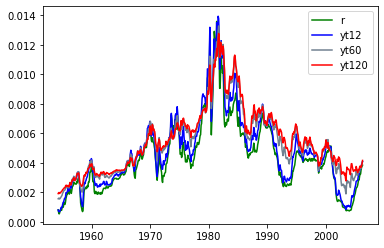

625


In [135]:
# import the needed data
df_bond = pd.read_excel("GovBondYields.xls",sheet_name="Rates",header=0)
df_bond = set_time_index(df_bond,"Date")

# Divide the rates by 1200 to arrive at monthly values

# get the names of the columns
colnames = df_bond.columns.tolist()

# get the wanted columns as pandas Series
month_3_interst_r = df_bond[colnames[0]] / 1200
month_12_interst = df_bond[colnames[2]] / 1200
month_60_interst = df_bond[colnames[5]] / 1200
month_120_interst = df_bond[colnames[7]] / 1200

# get some intuition for r_t and y_t
plt.plot(month_3_interst_r,color = "g",label = "r")
plt.plot(month_12_interst,color = "b",label = "yt12")
plt.plot(month_60_interst,color = "slategrey",label = "yt60")
plt.plot(month_120_interst,color = "r",label = "yt120")
plt.legend(loc = "best")
plt.show()

# get the time horizon
T = df_bond.shape[0]
print(T)

# define r_t and r_t -1 globally
r_t = month_3_interst_r[1:T]
r_t_1 = month_3_interst_r[0:T-1]

# month_12_interst = month_12_interst[1:T]
# month_60_interst = month_60_interst[1:T]
# month_120_interst = month_120_interst[1:T]

# here we can change something
# T =  T - 1

In [136]:
# checked: Runs well

# implement the model
def vasicek_model(rt,tau,k_q,o_q,sigma_r2):

    """ This function implements the calcualation of the implied yield
    :param rt: pandas Series of the short rate rt
    :param tau:  maturity in tau periods
    :param k_q: param of model for the bond prices adjusted by risk premia : speed of mean reversion
    :param o_q: param of model for the bond prices adjusted by risk premia : long run mean
    :param sigma_r2: parm of model for bond prices and short rate : variance
    :return: model implied yield in a 1 x T numpy matrix
    """

    # plotting:
    # plt.plot(month_120_interst,color = "r",label = f"yt 120 for all {tau}")

    # convert rt to a numpy matrix : Loose the dates but usefull for further calculation
    rt = np.matrix(rt)

    # rt being a column vector with dim T x 1
    rt = rt.getT()

    # print(rt.shape)

    b_tau = (1 - np.exp(-k_q*tau)) / k_q

    # a_tau = (o_q - (sigma_r2 / (2 * (k_q ** 2))))   *   (b_tau - tau)   -   (sigma_r2 / (4*k_q)) * (b_tau ** 2)
    h1 = (o_q - (sigma_r2 / (2*(k_q**2))))
    h2 = (b_tau - tau)
    h3 = (sigma_r2 / (4*k_q)) * (b_tau**2)
    a_tau = h1 * h2 - h3

    # price of a bond at time t with maturity tau
    p_t_tau = np.exp(a_tau - b_tau * rt)

    # continuoisly compounded yields
    y_t = (- 1/tau) * np.log(p_t_tau)

    # check the dimesnions : 1 x T : row vector
    # print(y_t.shape)
    # print(y_t.mean())

    # resduals
    # resid = np.matrix(month_120_interst) - y_t

    # plotting
    # plt.plot(ts_index, y_t.getT(),color = "yellow",label = f"yt_model 120 for all{tau}")
    # plt.plot(ts_index, resid.getT(),color = "black", label = f"residual yt 120 for all{tau}")
    # plt.legend(loc = "best")
    # plt.show()

    return y_t

# example call
# model_vas = vasicek_model(rt = r_t,tau = 120,k_q = 0.014895,o_q = 0.00466,sigma_r2 = 0.00037794**2)
# print(model_vas)

In [137]:
# checked

def joint_log_likelyhood_rt(rt,rt_1,o_p,k_p,sigma_r2):

    """THis function computes the jll of rt with a gaussian pdf
    :param rt: pandas Series of the short rate rt
    :param rt_1 : pandas Series of the short rate rt shifted by one day
    :param o_p: param of model, long run mean
    :param k_p: param of model, speed of the reversion
    :param sigma_r2: param of model, instantaneous variance of the interest rate shock
    :return: joint log likelyhood of all r_t = (r_1,...,rT) : skalar
    """

    # print(rt.shape)

    # optionally for demonstartion purpose
    rt = rt[1:T]

    # print(rt.shape)
    # print(rt_1.shape)

    # print(rt.describe())

    # convert rt to a numpy matrix
    rt_1 = np.matrix(rt_1)
    # print(rt_1)

    # rt_1 being a column vector with dim T x 1
    rt_1 = rt_1.getT()

    # dates from rt_1
    index_rt = rt.index

    # plotting
    # plt.plot(rt,color = "r",label = "rt")

    # convert rt to a numpy matrix
    rt = np.matrix(rt)
    # print(rt)

    # rt being a column vector with dim T x 1
    rt = rt.getT()

    # print(rt.shape)

    # calcuate the mu
    mu = (o_p * (1-np.exp(-k_p))) + (np.exp(-k_p) * rt_1)
    # print(mu)

    # residuals
    resid = rt-mu
    # print(resid.shape)

    # plotting
    # plt.plot(index_rt, mu.getT(),color = "yellow", label = "mu rt")
    # plt.plot(index_rt, resid.getT(),color = "black", label = "residual rt")
    # plt.legend(loc = "best")
    # plt.show()

    # check the dimesnions : 1 x (T-1) : row vector
    # print(rt-mu)
    # print((rt-mu).shape)

    # calcualte the sigma2
    # sigma2 = sigma_r2 * ((1-np.exp(-2 * k_p)) / (2*k_p))
    sigma2 = sigma_r2 * ((1 - np.exp(-2 * k_p)) / (2 * k_p))
    # print(sigma2)

    # we reduce the dimension by 1 here und this we also must reduce T
    t = T -1

    # in matrix notation: Key formula
    h1 = - (t/2) * np.log(2 * np.pi)
    h2 = - (t/2) * np.log(sigma2)
    h3 = - 1/2 * (resid.getT() * resid)/sigma2
    log_joint_likely = h1 + h2 + h3

    return float(log_joint_likely)

# a = joint_log_likelyhood_rt(rt = r_t,rt_1 = r_t_1,o_p = 0.00466,k_p = 0.014895,sigma_r2 = 0.00037794**2)
# print(a)

In [138]:
# checked

def joint_log_likelyhood_yt(rt,o_q,k_q,yt,tau,sigma_y2,sigma_r2):

    """THis function computes the jll of rt with a gaussian pdf

    :param rt: pandas Series of the short rate rt
    :param o_q: param of model
    :param k_q: param of model
    :param yt: pandas Series of the yield
    :param tau:  maturity in tau periods
    :param sigma_y2: instantaneous variance of the interest rate shock
    :param sigma_r2: parm of model
    :return: joint log likelyhood of all y_t = (y_1,...,yT) : skalar
    """
    # check the dimesnions : 1 x T : row vector
    # print(yt.shape)

    # dates from rt_1
    index_yt = yt.index
    # print(index_yt)

    # calcuate the mu
    # you can interpret observed yields as Vasicek (model)-implied yield plus a Gaussian measurement error
    # the expectation of the error is 0 and thus the mu of the true series yt is just the model implied yield
    mu = vasicek_model(rt,tau,k_q,o_q,sigma_r2)
    # print(mu)

    # plotting
    # plt.plot(yt,color = "r",label = f"yt {tau}")

    # convert yt to a numpy matrix
    yt = np.matrix(yt)

    # rt being a column vector with dim T x 1
    yt = yt.getT()

    # print(mu.shape)
    # print(yt.shape)

    # residuals
    resid = yt-mu

    # print(mu.getT())

    # plotting
    # plt.plot(index_yt, mu.getT(),color = "yellow",label = f"yt_model (mu){tau}")
    # plt.plot(index_yt, resid.getT(),color = "black", label = f"residual {tau}")
    # plt.legend(loc ="best")
    # plt.show()

    # check the dimesnions : 1 x T : row vector
    # print(mu.shape)

    # check the dimesnions : 1 x T : row vector
    # print((yt-mu).shape)

    # calcualte the sigma
    sigma2 = sigma_y2

    # in matrix notation
    h1 = - (T/2) * np.log(2 * np.pi)
    h2 = - (T/2) * np.log(sigma2)
    h3 = - 1/2 * (resid.getT() * resid)/sigma2
    log_joint_likely = h1 + h2 + h3

    return float(log_joint_likely)

# b = joint_log_likelyhood_yt(rt = r_t,k_q = 0.014895,o_q = 0.00466,tau = 120,yt = month_120_interst,sigma_y2 = 0.000777**2,sigma_r2 = 0.00037794**2)
# print(b)


In [139]:
# checked

def joint_likelyhood_yt_rt(param_vec,rate_df,yield_df):

    """This function computes the joint likelyhood function
    :param param_vec: vector with params of the model
    :param rate_df: dataframe containing the r
    :param yield_df: dataframe containing the y for all maturities
    :return: negative log likelyhood with given unknown parameters: skalar
    """

    # order of the parm vector
    # [o_p,k_p,o_q,k_q,sigma_y2,sigma_r2]

    # get the parameters
    o_p = param_vec[0]
    k_p = param_vec[1]
    o_q = param_vec[2]
    k_q = param_vec[3]
    sigma_y2 = param_vec[4]
    sigma_r2 = param_vec[5]

    # IDEA: joint log likelihood function can be treated as the sum of 4 pairwise independent log likelihood functions

    # call all the functions
    L_r = joint_log_likelyhood_rt(rt =rate_df,rt_1 = r_t_1,o_p = o_p,k_p = k_p,sigma_r2 = sigma_r2)
    # print(f"Log likelyhood of r_t : {L_r}")

    L_y_12 = joint_log_likelyhood_yt(yt = yield_df["12"],sigma_y2 =sigma_y2 ,rt = rate_df,tau = 12,k_q = k_q,o_q = o_q,sigma_r2 = sigma_r2)
    # print(f"Log likelyhood of y_12 : {L_y_12}")
    L_y_60 = joint_log_likelyhood_yt(yt =yield_df["60"],sigma_y2 =sigma_y2 ,rt = rate_df,tau = 60,k_q = k_q,o_q = o_q,sigma_r2 = sigma_r2)
    # print(f"Log likelyhood of y60 : {L_y_60}")
    L_y_120 = joint_log_likelyhood_yt(yt =yield_df["120"],sigma_y2 =sigma_y2 ,rt = rate_df,tau = 120,k_q = k_q,o_q = o_q,sigma_r2 = sigma_r2)
    # print(f"Log likelyhood of y_120 : {L_y_120}")

    # compute the total joint likelyhood function
    L = L_r + L_y_12 + L_y_60 + L_y_120

    # print(f"Total negative Log likelyhood: {L * -1}")

    # return the negative log likelyhood
    return (L * -1)

In [140]:
# data month_3_interst_r r_t
rate_df = month_3_interst_r
yield_df = pd.DataFrame()
yield_df["12"] = month_12_interst
yield_df["60"] = month_60_interst
yield_df["120"] =month_120_interst

# parameters as default
o_p = 0.00466
k_p = 0.014895
o_q = 0.00466
k_q = 0.014895
sigma_r2 = 0.00037794**2

# already sig**2,
sigma_y2 = 0.000777**2

# all in one vector
param_vec = [o_p,k_p,o_q,k_q,sigma_y2,sigma_r2]

# check for correctness wrong
L = joint_likelyhood_yt_rt(param_vec,rate_df,yield_df)

In [141]:
# now start with the numerical optimazation of the negative joint likelihood function

# starting values
starting_v = np.array([o_p,k_p,o_q,k_q,sigma_y2,sigma_r2])

# get the length: number of unknown parameters
K = len(starting_v)

# lower bounds
lb = -1 * np.ones(K)
lb[K-2] = 0.00001**2
lb[K-1] = 0.00001**2

# upper bounds
ub = 1 * np.ones(K)

# bounds:
bounds = tuple((lb[x],ub[x]) for x in range(0,K))
# print(bounds)

# from scipy.optimize import Bounds
# bounds = Bounds(np.array([-1,-1,-1,-1,1e-5,1e-5]),np.array([1,1,1,1,1,1]))

In [142]:
import scipy.optimize

# args = (...) are the pandas data frames for the short rate r and the 3 yields y that are used to learn the parameters

# optimazation lokally
# See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

# returns the optimized values
mle_estimate_lokally = scipy.optimize.minimize(fun = joint_likelyhood_yt_rt,x0 = starting_v,args=(rate_df, yield_df),bounds = bounds, method = "L-BFGS-B", options={'ftol' : 1e-12, 'gtol' : 1e-12})
print(mle_estimate_lokally)

theta_p_local = mle_estimate_lokally.x[0]
kappa_p_local = mle_estimate_lokally.x[1]
theta_q_local =mle_estimate_lokally.x[2]
kappa_q_local =mle_estimate_lokally.x[3]
sigma_y_local =mle_estimate_lokally.x[4]
sigma_local =mle_estimate_lokally.x[5]
print('theta_p_local = ', theta_p_local)
print('kappa_p_local = ', kappa_p_local)
print('theta_q_local = ', theta_q_local)
print('kappa_q_local = ', kappa_q_local)
print('sigma_y_local = ', np.sqrt(sigma_y_local))
print('sigma_local = ', np.sqrt(sigma_local))

      fun: -13057.58277613451
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.44924808e-01,  3.62051651e+00, -9.69365885e+05,  5.08064342e+04,
       -2.82287928e+09,  1.23772371e+09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([4.66000000e-03, 1.48950000e-02, 4.66000000e-03, 1.48950000e-02,
       6.03729000e-07, 1.42838644e-07])
theta_p_local =  0.00466
kappa_p_local =  0.014895
theta_q_local =  0.00466
kappa_q_local =  0.014895
sigma_y_local =  0.000777
sigma_local =  0.00037794


<ipython-input-136-9da2f7584b43>:35: RuntimeWarning: overflow encountered in exp
  p_t_tau = np.exp(a_tau - b_tau * rt)
c:\users\win10\pycharmprojects\elasticstack\venv\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [143]:
# optimazation globally

# returns the optimized values
mle_estimate_gloabally = scipy.optimize.dual_annealing(func = joint_likelyhood_yt_rt,args=(rate_df, yield_df),bounds = bounds,seed = 19937, maxiter=2000)
print(mle_estimate_gloabally)

theta_p_global = mle_estimate_gloabally.x[0]
kappa_p_global = mle_estimate_gloabally.x[1]
theta_q_global =mle_estimate_gloabally.x[2]
kappa_q_global =mle_estimate_gloabally.x[3]
sigma_y_global =mle_estimate_gloabally.x[4]
sigma_global =mle_estimate_gloabally.x[5]
print('theta_p_global = ', theta_p_global)
print('kappa_p_global = ', kappa_p_global)
print('theta_q_global = ', theta_q_global)
print('kappa_q_global = ', kappa_q_global)
print('sigma_y_global = ', np.sqrt(sigma_y_global))
print('sigma_global = ', np.sqrt(sigma_global))

<ipython-input-136-9da2f7584b43>:35: RuntimeWarning: overflow encountered in exp
  p_t_tau = np.exp(a_tau - b_tau * rt)


KeyboardInterrupt: 

In [ ]:
def get_priced_in_risk(rt,param_vec,tau):

    """This function calculates the  priced-in market price of risk
    :param rt: pandas Series of pandas Series of the short rate rt
    :param param_vec: array with optimized values
    :return:
    """

    # [o_p,k_p,o_q,k_q,sigma_y2,sigma_r2]

    # convert rt to a numpy matrix : not needed here and so the dates won't get lost for plotting
    # rt = np.matrix(rt)

    # rt being a column vector with dim T x 1
    # rt = rt.getT()

    # check the dimesnions:
    # print(rt.shape)

    # get the estimated values
    o_p = param_vec[0]
    k_p = param_vec[1]
    o_q = param_vec[2]
    k_q = param_vec[3]
    sigma_r2 = param_vec[K-1]

    # needed help formulas : skalars

    # is positive and large
    lam0 = (k_p * o_p - k_q * o_q) / np.sqrt(sigma_r2)
    # print(lam0)

    # is negative and big
    lam1 = (k_q - k_p) / np.sqrt(sigma_r2)
    # print(lam1)

    # sharpe ratio
    mpr = lam0 + lam1 * rt

    b_tau = (1 - np.exp(-k_q*tau)) / k_q

    # priced in expected risk premium
    erp = - b_tau * np.sqrt(sigma_r2) * mpr

    return erp

In [ ]:
print("starting")
print("*" * 10)

# get the parameters
o_p_new = 0.004701016867372424
k_p_new = 0.014917206718773097
o_q_new = 0.011262873417696717 failed
k_q_new = 0.004345841310248678 failed
sigma_y2_new = 0.000776656101774807**2 failed
sigma_r2_new = 0.00037944957706293657**2 failed

# overwrite with new gloabally values
parma_vec_new = np.array([o_p_new,k_p_new,o_q_new,k_q_new,sigma_y2_new,sigma_r2_new])

# define the maturity
tau = 120

priced_in_risk_120 = get_priced_in_risk(month_3_interst_r,parma_vec_new,tau=tau)
# print(priced_in_risk_120)

# plotting
plt.plot(month_3_interst_r.index, priced_in_risk_120)
plt.show()

# get the wanted values
erp_0 = priced_in_risk_120[0]
erp_10 = priced_in_risk_120[10]
erp_100 = priced_in_risk_120[100]
erp_500 = priced_in_risk_120[500]

print(float(erp_0)) failed
print(float(erp_10)) failed
print(float(erp_100)) failed
print(float(erp_500))

In [ ]:
not good start here tomorrow

uploead checker file with valus from e_special

rt_new = month_3_interst_r

# convert rt to a numpy matrix : not needed here and so the dates won't get lost for plotting
# rt_new = np.matrix(rt_new)
# rt being a column vector with dim T x 1
# rt_new = rt_new.getT()

# print(rt_new.shape)
# print(priced_in_risk_120.shape)

# print(rt_new)
# print(priced_in_risk_120)

# both pandas Series
mu_special = rt_new + priced_in_risk_120
# print(mu_special)

# starts from second observation
mu_special = mu_special[1:len(rt_new)]

# looks good
plt.plot(mu_special)
plt.show()

# get the wanted values
mu_0 = mu_special[0] failed
mu_1 = mu_special[1] failed
mu_100 = mu_special[100]
mu_500 = mu_special[500]

print(float(mu_0))
print(float(mu_1))
print(float(mu_100))
print(float(mu_500))

[[-2.32029689e-04]
 [-1.59620825e-04]
 [ 5.56519164e-06]
 [ 1.06552291e-04]
 [ 1.73533741e-05]
 [-8.15361386e-05]
 [-9.85729677e-05]
 [ 1.25810095e-04]
 [ 3.52461927e-06]
 [-9.56116684e-05]
 [ 3.71047275e-05]
 [ 2.05128656e-04]
 [-1.66046332e-04]
 [-8.44404233e-05]
 [ 1.06732693e-04]
 [ 2.00743722e-04]
 [ 9.61120128e-05]
 [ 8.98762665e-05]
 [-3.31495340e-05]
 [ 2.08640520e-04]
 [-1.45991189e-04]
 [-1.14261893e-04]
 [-9.87057134e-05]
 [ 2.50430574e-04]
 [-2.85841976e-05]
 [-1.36794143e-04]
 [-1.88274793e-04]
 [ 2.01170899e-04]
 [ 1.63082469e-04]
 [ 1.60437683e-05]
 [ 4.17840931e-05]
 [ 1.51227914e-04]
 [-1.12724229e-04]
 [-3.89581033e-05]
 [-4.74148241e-05]
 [-3.93282657e-05]
 [-3.94516532e-05]
 [ 1.60424959e-04]
 [-1.36737129e-04]
 [ 1.44992167e-04]
 [ 1.05916638e-04]
 [ 1.62241704e-05]
 [-2.49825559e-04]
 [-2.53157021e-04]
 [-5.31488482e-04]
 [-7.97225064e-04]
 [-2.41786657e-04]
 [-1.94624569e-04]
 [-2.38388822e-04]
 [-1.24436680e-04]
 [ 7.90955357e-06]
 [ 5.92229987e-04]
 [ 5.7685420

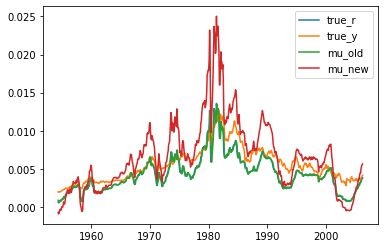

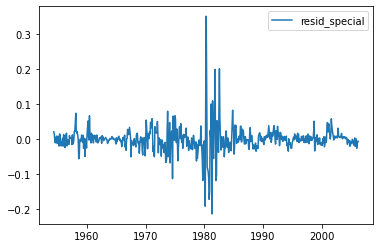

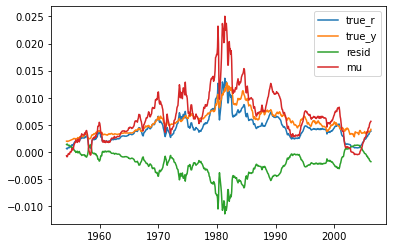

Date
1954-05-01    0.001354
1954-06-01    0.001453
1954-07-01    0.001387
1954-08-01    0.001223
1954-09-01    0.001148
                ...   
2005-12-01   -0.001224
2006-01-01   -0.001512
2006-02-01   -0.001669
2006-03-01   -0.001735
2006-04-01   -0.001809
Name: 3, Length: 624, dtype: float64
0.021696642971385054
0.014925831609178633
0.006315191236171747
0.011430777128305003


In [160]:
o_p_new = 0.004701016867372424
k_p_new = 0.014917206718773097
o_q_new = 0.011262873417696717
k_q_new = 0.004345841310248678
sigma_y2_new = 0.000776656101774807**2
sigma_r2_new = 0.00037944957706293657**2

# resid of yt
# optionally for demonstartion purpose
rt = month_3_interst_r[1:T]

# print(rt.shape)
# print(rt_1.shape)

# print(rt.describe())

# convert rt to a numpy matrix
rt_1 = np.matrix(r_t_1)
# print(rt_1)

# rt_1 being a column vector with dim T x 1
rt_1 = rt_1.getT()

# dates from rt_1
index_rt = rt.index

# plotting
# plt.plot(rt,color = "r",label = "rt")

# convert rt to a numpy matrix
rt = np.matrix(rt)
# print(rt)

# rt being a column vector with dim T x 1
rt = rt.getT()

# print(rt.shape)

# calcuate the mu
mu = (o_p * (1-np.exp(-k_p_new))) + (np.exp(-k_p_new) * rt_1)
# print(mu)

# residuals
resid = rt-mu
print(resid)

# shock from decompisition
b_tau = (1 - np.exp(-k_q_new*tau)) / k_q_new
e_special = -b_tau * resid
print(e_special)
# plt.plot(index_rt,resid,label = "resid")

plt.plot(month_3_interst_r[1:T],label = "true_r")
plt.plot(month_120_interst[1:T],label = "true_y")
plt.plot(index_rt,mu,label = "mu_old")
plt.plot(mu_special,label = "mu_new")
plt.legend()
plt.show()

plt.plot(index_rt,e_special,label = "resid_special")
plt.legend()
plt.show()

# looks good
# plt.plot(mu_special)
# print(e_special.shape)
# print(np.matrix(mu_special).getT().shape)
help = month_3_interst_r[1:T] - mu_special

plt.plot(month_3_interst_r[1:T],label = "true_r")
plt.plot(month_120_interst[1:T],label = "true_y")
plt.plot(index_rt,help,label = "resid")
plt.plot(mu_special,label = "mu")
plt.legend()
plt.show()

# print(month_3_interst_r)
print(help)


e_0 = e_special[0]
e_1 = e_special[1]
e_100 = e_special[100]
e_500 = e_special[500]

# get the wanted values

print(float(e_0))
print(float(e_1))
print(float(e_100))
print(float(e_500))